In [1]:
import scipy.spatial.distance as sdist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = np.array([16.18033, 10])    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 22})

In [4]:
from scipy.interpolate import interp1d

In [6]:
a = np.load("/Users/weilu/Research/database/cmap.npz")

In [9]:
a['gly'].shape

(24, 24)

In [43]:
dict(a)

{'gly': array([[-4.2341065 , -3.61091791, -3.25809654, -3.21887582, -3.40119738,
         -3.8918203 , -4.48863637, -2.89037176, -1.38629436, -0.        ,
         -0.        , -0.        , -0.        , -0.        , -0.        ,
         -0.69314718, -3.91202301, -4.60517019, -4.00733319, -3.4339872 ,
         -3.29583687, -3.61091791, -3.80666249, -4.27666612],
        [-3.29583687, -3.13549422, -2.07944154, -2.94443898, -3.09104245,
         -4.00733319, -3.91202301, -1.60943791, -0.        , -0.        ,
         -0.        , -0.        , -0.        , -0.        , -0.69314718,
         -2.48490665, -4.30406509, -4.30406509, -3.36729583, -2.89037176,
         -2.83321334, -3.40119738, -3.55534806, -3.36729583],
        [-2.56494936, -1.60943791, -1.94591015, -1.79175947, -2.77258872,
         -2.99573227, -2.39789527, -0.        , -0.        , -0.        ,
         -0.        , -0.        , -0.        , -0.        , -1.09861229,
         -3.91202301, -3.93182563, -3.04452244, -2.5649

In [38]:
from scipy import interpolate

data = a['gly']
data = a['nppg']
new_data = np.zeros((25, 25))
new_data[0,1:] = data[-1,:]
new_data[1:,0] = data[:,-1]
new_data[1:,1:] = data
new_data[0,0] = data[-1,-1]
# x = np.arange(-180, 195, 15)
# y = np.arange(-180, 195, 15)
x = np.arange(-np.pi, np.pi+(np.pi/12), (np.pi/12))
y = np.arange(-np.pi, np.pi+(np.pi/12), (np.pi/12))
xx, yy = np.meshgrid(x, y)

f = interpolate.interp2d(x, y, new_data, kind='cubic')

num_of_points = 100
dangle = (2*np.pi/num_of_points)
x = np.arange(-np.pi, np.pi+dangle, dangle)
y = np.arange(-np.pi, np.pi+dangle, dangle)
dihedral_table = f(x,y)

99.99999999999999

In [49]:
dihedral_table.shape

(101, 101)

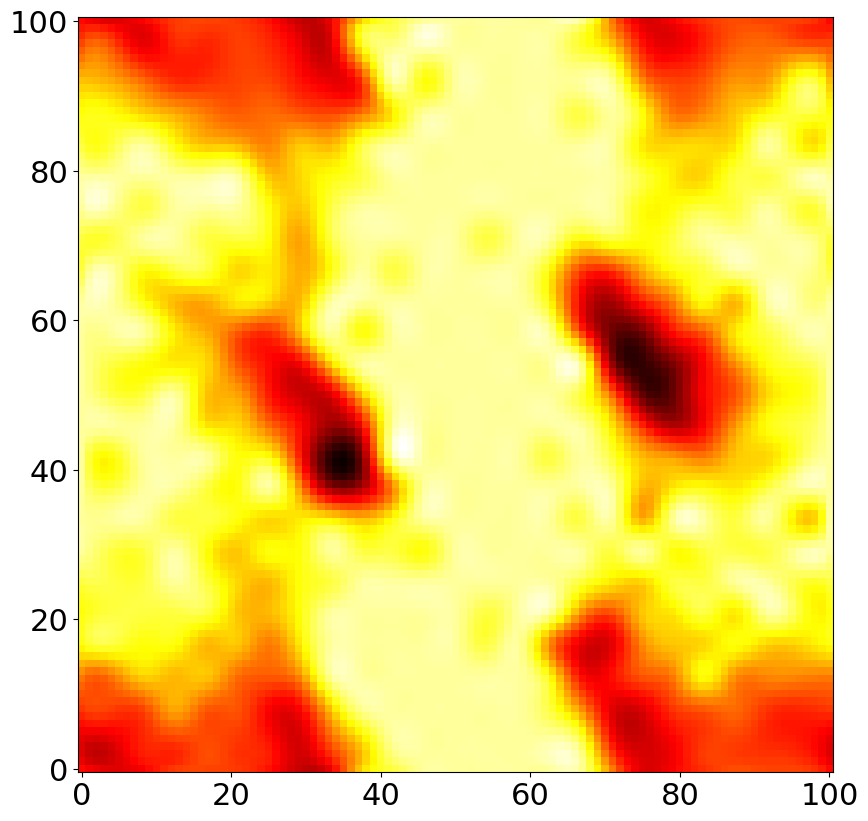

In [50]:

plt.imshow(dihedral_table, origin=0, cmap="hot")

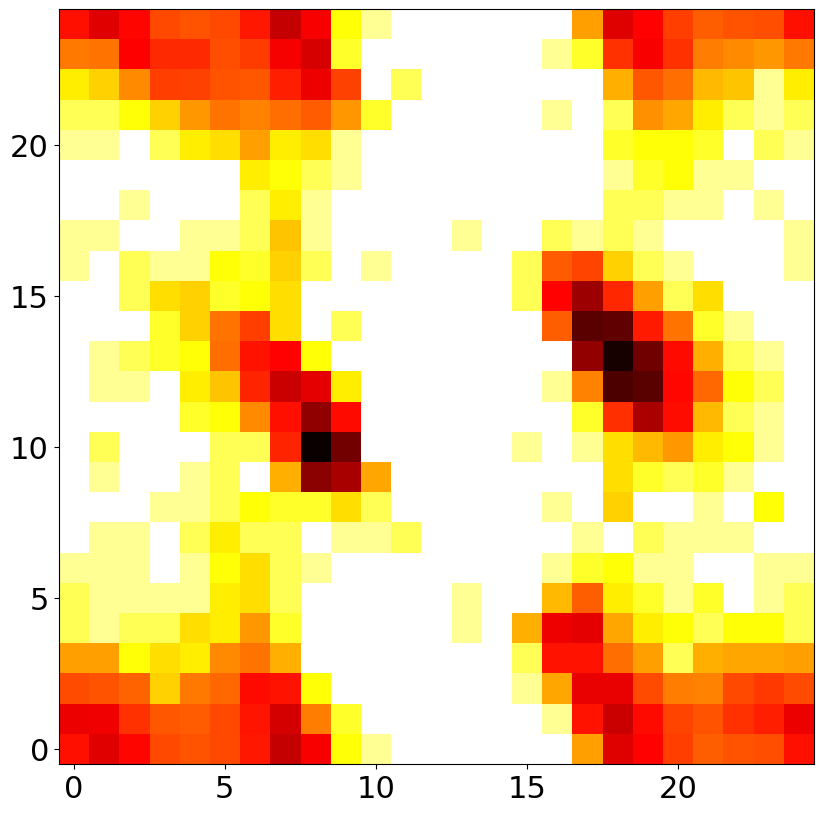

In [26]:
plt.imshow(new_data, origin=0, cmap="hot")

In [24]:
data[0,:] == data[-1,:]

array([False, False, False, False,  True, False, False, False, False,
       False,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False])

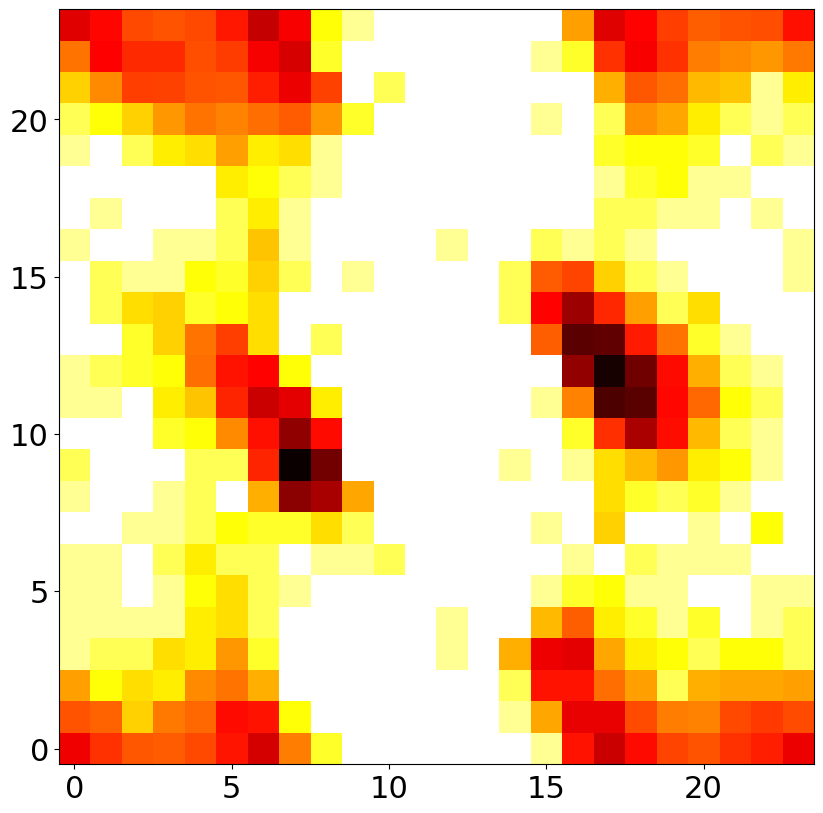

In [25]:
plt.imshow(data,origin=0, cmap="hot")


In [18]:
new_data

array([[-3.95124372, -4.36944785, -4.04305127, -3.40119738, -3.29583687,
        -3.40119738, -3.87120101, -4.66343909, -4.15888308, -1.60943791,
        -0.69314718, -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -2.56494936, -4.39444915, -4.06044301,
        -3.49650756, -3.17805383, -3.29583687, -3.33220451, -3.95124372],
       [-4.27666612, -4.2341065 , -3.61091791, -3.25809654, -3.21887582,
        -3.40119738, -3.8918203 , -4.48863637, -2.89037176, -1.38629436,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.69314718, -3.91202301, -4.60517019, -4.00733319,
        -3.4339872 , -3.29583687, -3.61091791, -3.80666249, -4.27666612],
       [-3.36729583, -3.29583687, -3.13549422, -2.07944154, -2.94443898,
        -3.09104245, -4.00733319, -3.91202301, -1.60943791, -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.69314718, -2.48490665, -4.30406509, -4

In [ ]:
x = phi_x
spline = phispline

num_of_points = 100
n = spline.shape[0]
interaction_list = []
index_list = []

xnew = np.linspace(min(x), max(x), num=num_of_points, endpoint=True)
for i in range(n):
    for j in range(i+1, n):
        if np.alltrue(spline[i][j] == 0):
            continue
        y = spline[i][j]
        f = interp1d(x, y, kind='cubic')
        ynew = f(xnew)
        interaction_list.append(ynew)
        index_list.append([i, j])
index_array = np.array(index_list)
interaction_array = np.array(interaction_list)

angle_max = max(x)
angle_min = min(x)
dangle = (angle_max-angle_min)/(num_of_points-1)

max_angle_index_1 = num_of_points - 2
interaction_n = index_array.shape[0]

In [7]:
dict(a)

{'gly': array([[-4.2341065 , -3.61091791, -3.25809654, -3.21887582, -3.40119738,
         -3.8918203 , -4.48863637, -2.89037176, -1.38629436, -0.        ,
         -0.        , -0.        , -0.        , -0.        , -0.        ,
         -0.69314718, -3.91202301, -4.60517019, -4.00733319, -3.4339872 ,
         -3.29583687, -3.61091791, -3.80666249, -4.27666612],
        [-3.29583687, -3.13549422, -2.07944154, -2.94443898, -3.09104245,
         -4.00733319, -3.91202301, -1.60943791, -0.        , -0.        ,
         -0.        , -0.        , -0.        , -0.        , -0.69314718,
         -2.48490665, -4.30406509, -4.30406509, -3.36729583, -2.89037176,
         -2.83321334, -3.40119738, -3.55534806, -3.36729583],
        [-2.56494936, -1.60943791, -1.94591015, -1.79175947, -2.77258872,
         -2.99573227, -2.39789527, -0.        , -0.        , -0.        ,
         -0.        , -0.        , -0.        , -0.        , -1.09861229,
         -3.91202301, -3.93182563, -3.04452244, -2.5649

In [ ]:
x = [0.0, 2.0, 3.5, 4.25, 4.75, 5.25, 5.75, 6.25, 6.75, 7.25, 7.75, 8.25, 8.75, 9.25, 9.75, 10.25, 10.75, 11.25, 11.75, 12.25, 12.75, 13.25, 13.75, 14.25, 14.75, 15.25, 15.75, 16.25, 16.75, 17.25, 17.75, 18.25, 18.75, 19.25, 19.75]
num_of_points = 100
dataFile = "/Users/weilu/Research/server/jun_week3_2020/for_mingchen/T1061/dist.npz"

# spline fit
a = np.load(dataFile)
distspline = a['distspline']

In [72]:


n = distspline.shape[0]
interaction_list = []
index_list = []
xnew = np.linspace(min(x), max(x), num=num_of_points, endpoint=True)
for i in range(n):
    for j in range(i+1, n):
        if np.alltrue(distspline[i][j] == 0):
            continue
        y = distspline[i][j]
        y -= y[-1]
        f = interp1d(x, y)
        ynew = f(xnew)
        interaction_list.append(ynew)
        index_list.append([i, j])
index_array = np.array(index_list)
interaction_array = np.array(interaction_list)
# np.savez(saved_file, index_array=index_array, interaction_array=interaction_array)

In [9]:
interaction_array.shape

(445015, 100)

In [16]:
a_argmin = np.argmin(interaction_array, axis=1)

In [20]:
np.sum(a_argmin == 99)

135995

In [77]:
chosen = interaction_array[a_argmin==99]

In [78]:
chosen_index = index_array[a_argmin==99]

In [29]:
chosen_index

array([[  0,  13],
       [  0,  14],
       [  0,  15],
       ...,
       [931, 937],
       [931, 938],
       [937, 948]])

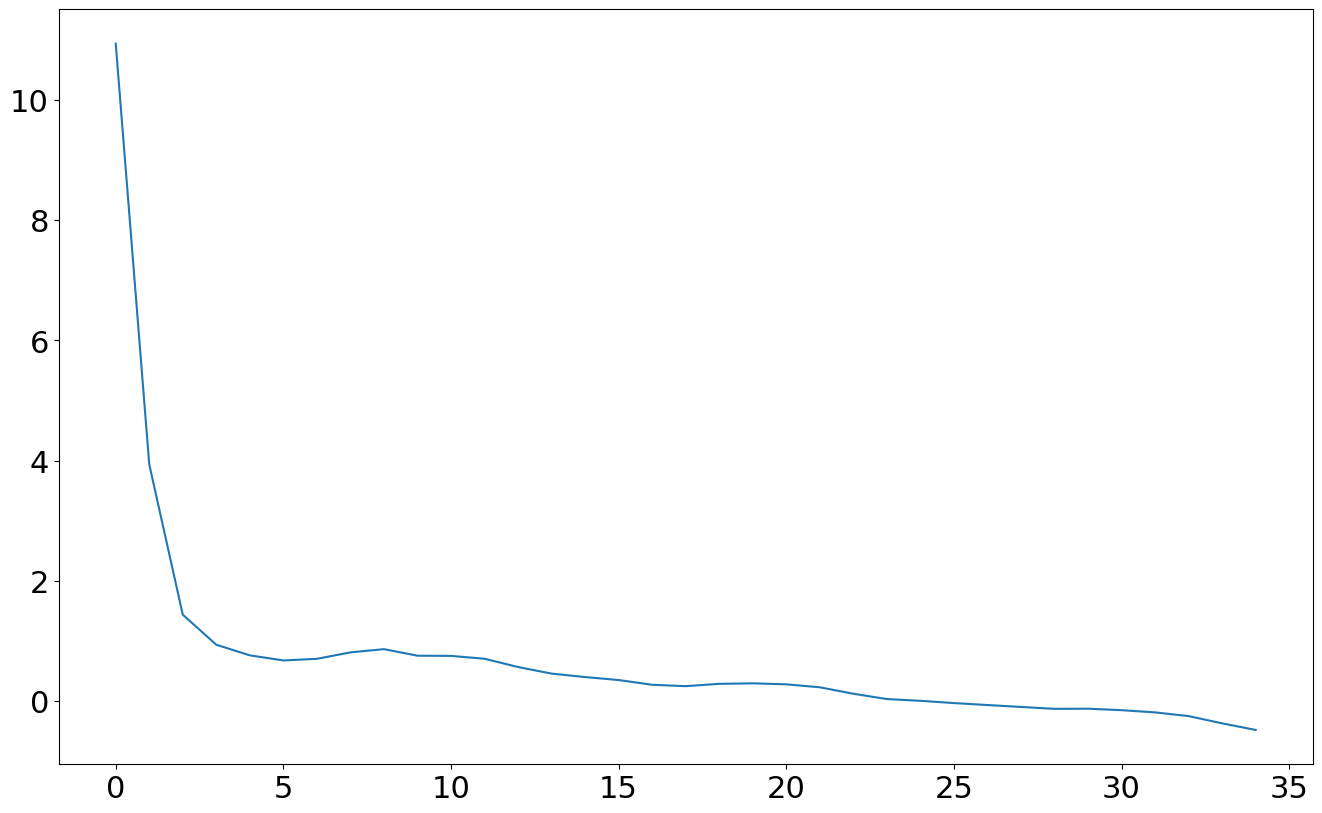

In [33]:
plt.plot(distspline[chosen_index[0][0]][chosen_index[0][1]])

In [22]:
chosen

array([[10.93533162, 10.2370993 ,  9.53886698, ..., -0.39471578,
        -0.43852343, -0.48233109],
       [10.75149195, 10.05325963,  9.35502731, ..., -0.41862131,
        -0.45089315, -0.48316498],
       [10.86571496, 10.16748264,  9.46925031, ..., -0.46649913,
        -0.47509429, -0.48368945],
       ...,
       [13.23262119, 12.53438887, 11.83615655, ..., -0.39738602,
        -0.43905326, -0.48072051],
       [12.04280709, 11.34457477, 10.64634245, ..., -0.43673241,
        -0.459188  , -0.4816436 ],
       [11.36342453, 10.66519221,  9.96695988, ..., -0.47780904,
        -0.48075989, -0.48371073]])

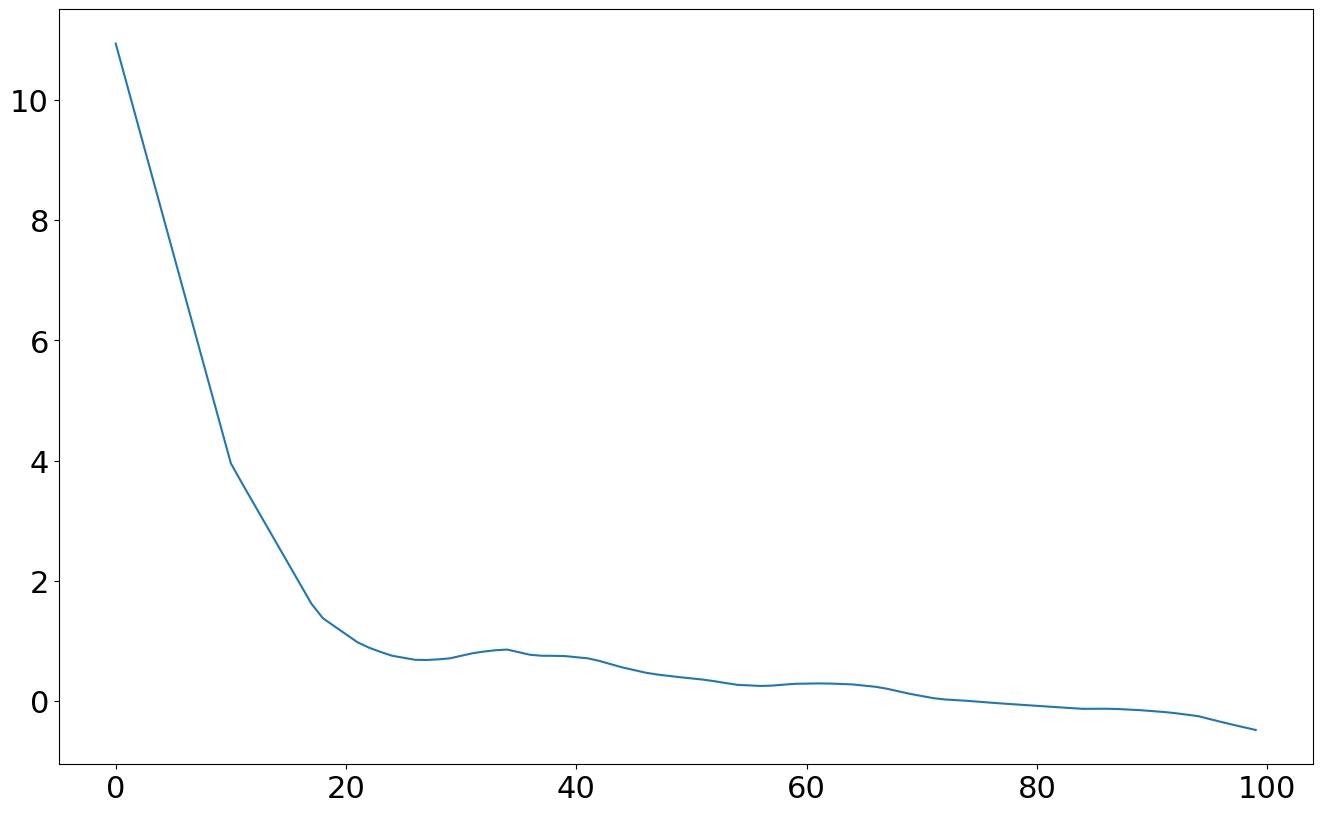

In [23]:
plt.plot(chosen[0])

In [86]:
chosen_cutoff90 = interaction_array[a_argmin>90]
chosen_cutoff90.shape

(143119, 100)

In [37]:
chosen_cutoff50 = interaction_array[a_argmin>50]

In [38]:
chosen_cutoff50.shape

(425650, 100)

In [39]:
chosen_cutoff50 = interaction_array[a_argmin<50]

In [40]:
chosen_cutoff50.shape

(19365, 100)

In [44]:
a_argmin.max()

99

In [48]:
x_of_min_f = [xnew[i] for i in a_argmin]

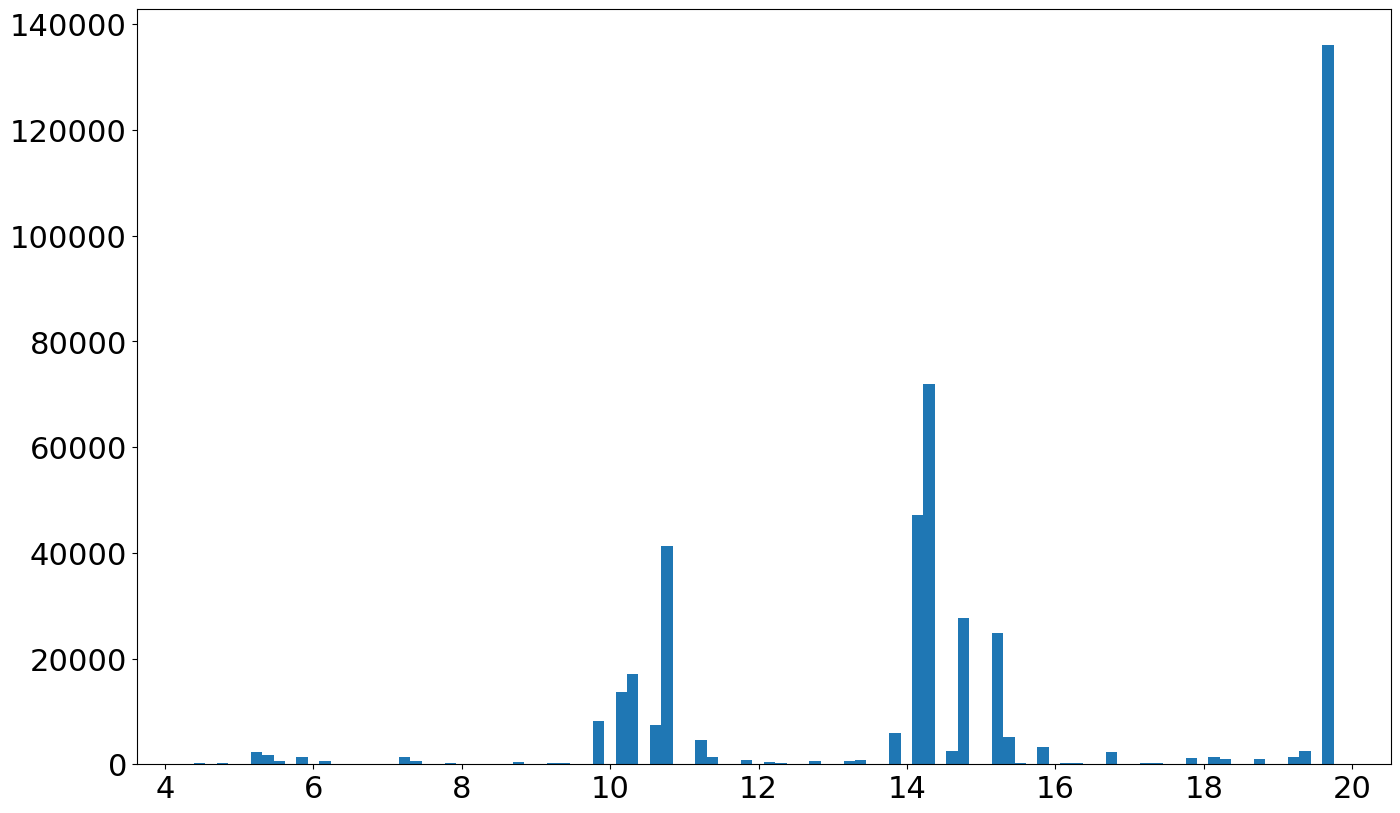

In [55]:
_ = plt.hist(x_of_min_f, bins=100)

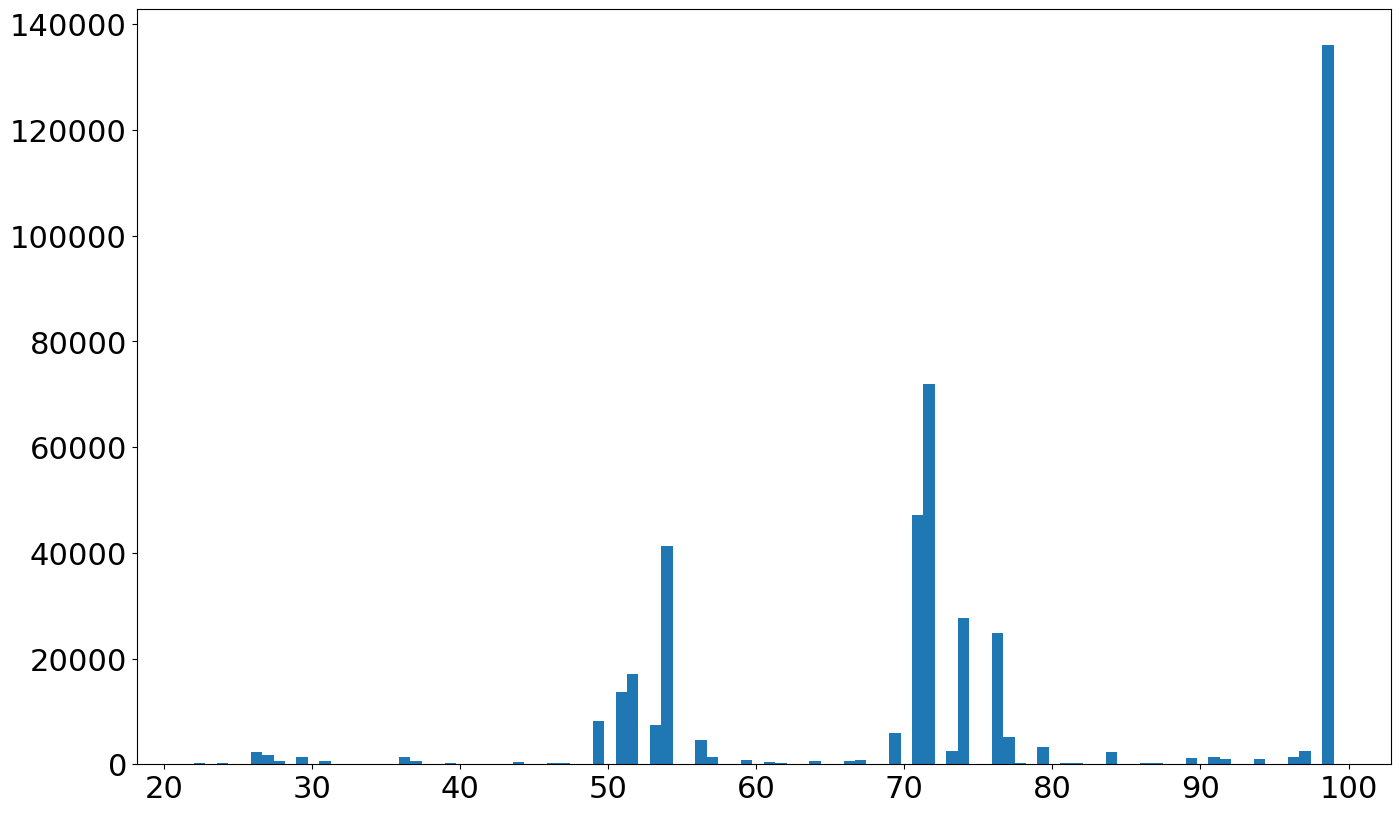

In [56]:
_ = plt.hist(a_argmin, bins=100)

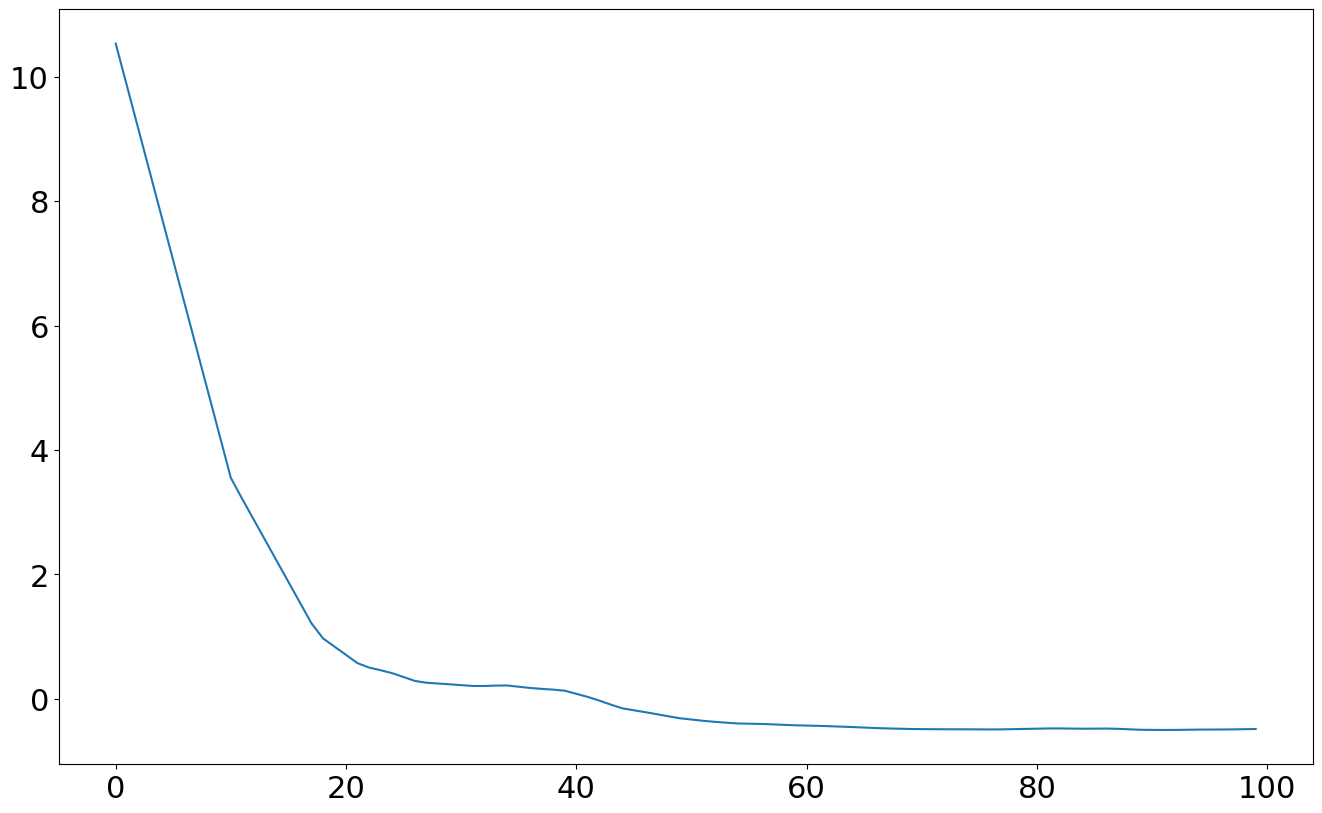

In [59]:
plt.plot(interaction_array[a_argmin==91][0])

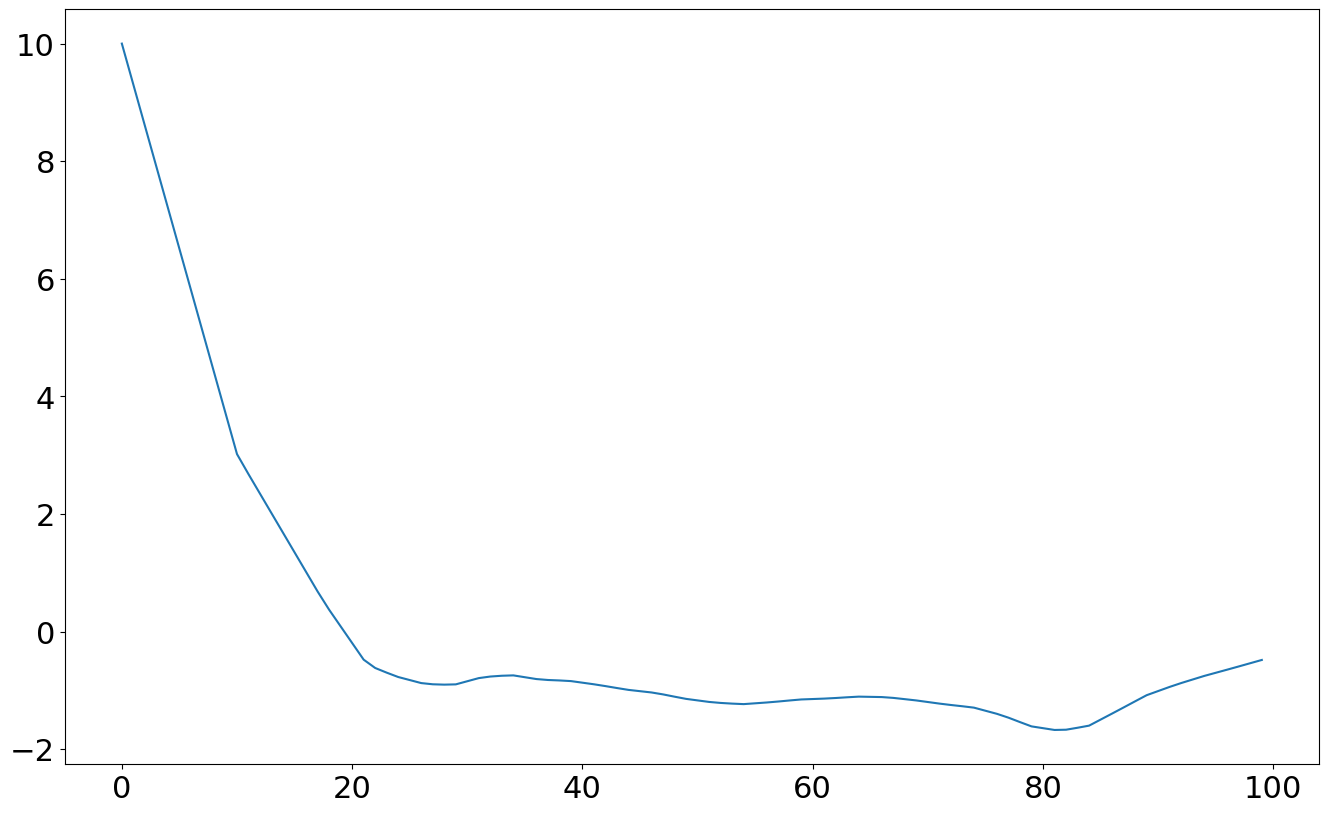

In [61]:
plt.plot(interaction_array[a_argmin==81][0])

In [73]:
np.argmin(interaction_array, axis=0)

array([ 90704,  90704,  90704,  90704,  90704,  90704,  90704,  90704,
        90704,  90704,  90704,  90704,  90704,  90704,  90704,  90704,
        90704,  90704, 442973, 225030, 281004, 243921, 339569, 398142,
       413152, 407618, 370431, 337779, 338674, 412896, 399228, 398410,
       398684, 364041, 398143, 436557, 407619, 399501, 366475, 436676,
       404599, 436432, 412911, 413153, 436677, 398144, 397881, 398145,
       398961, 398411, 364858, 436795, 398413, 398687, 398412, 398686,
       364859, 412912, 416141, 406793, 436678, 436678, 398414, 398147,
       398147, 364860, 406794, 412136, 404590, 404297, 398148, 398148,
       398148, 407892, 398415, 398415, 398415, 414768, 412646, 412646,
       412646, 415205, 415205, 307008, 307008, 307008, 435502, 435502,
       435502, 415432, 415432, 415432, 415432, 415432, 415432, 415432,
       435902, 435902, 435902,      0])

In [85]:
np.argmin(interaction_array[435902])

87

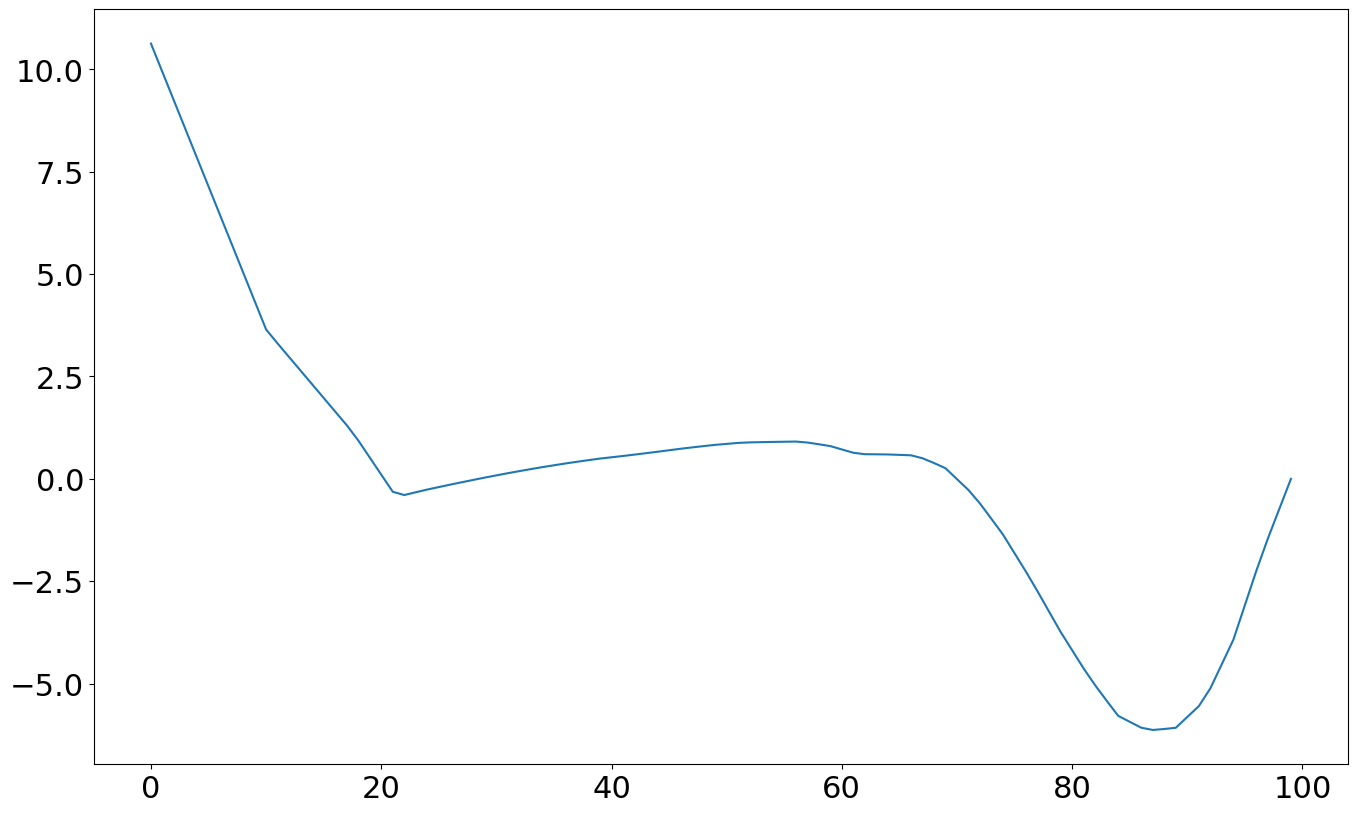

In [84]:
plt.plot(interaction_array[435902])

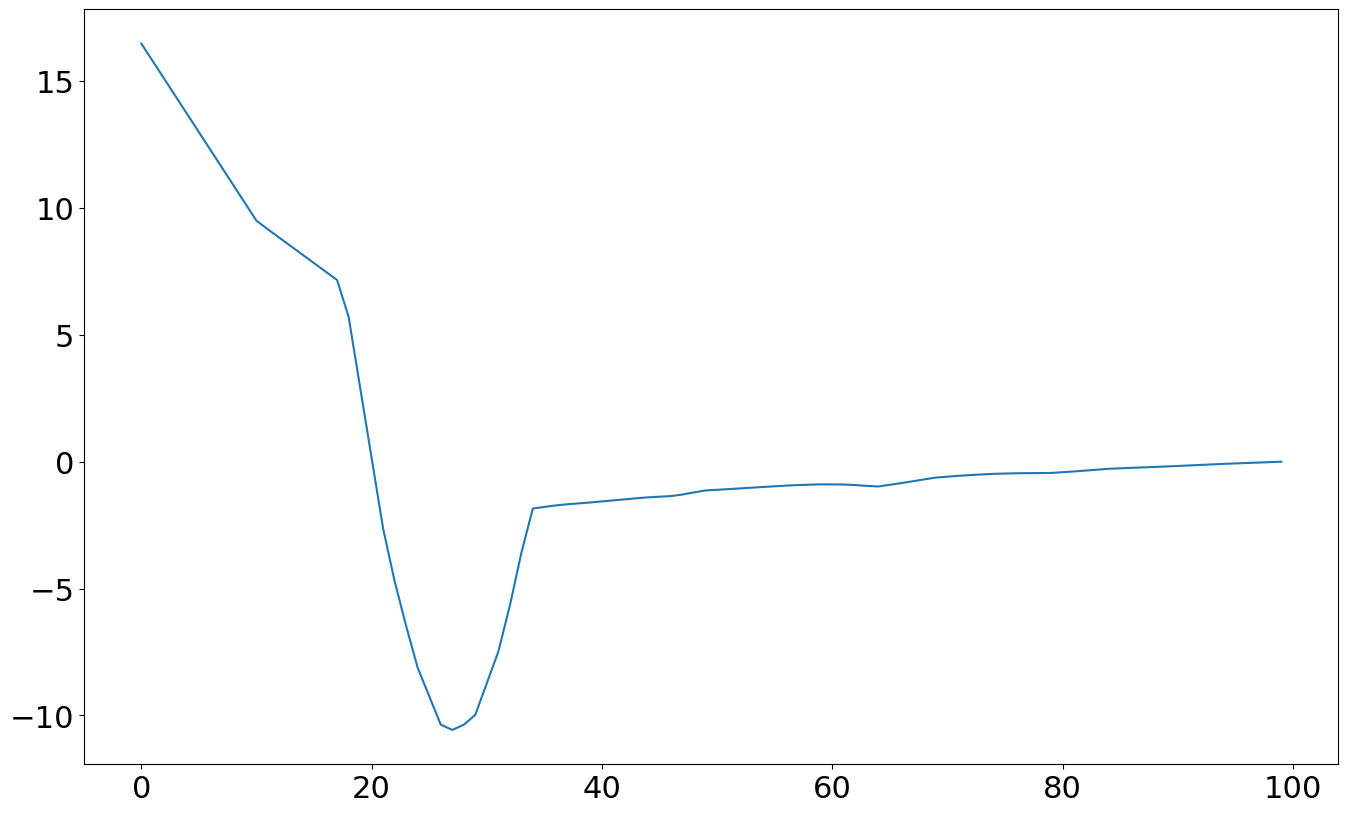

In [74]:
plt.plot(interaction_array[0])

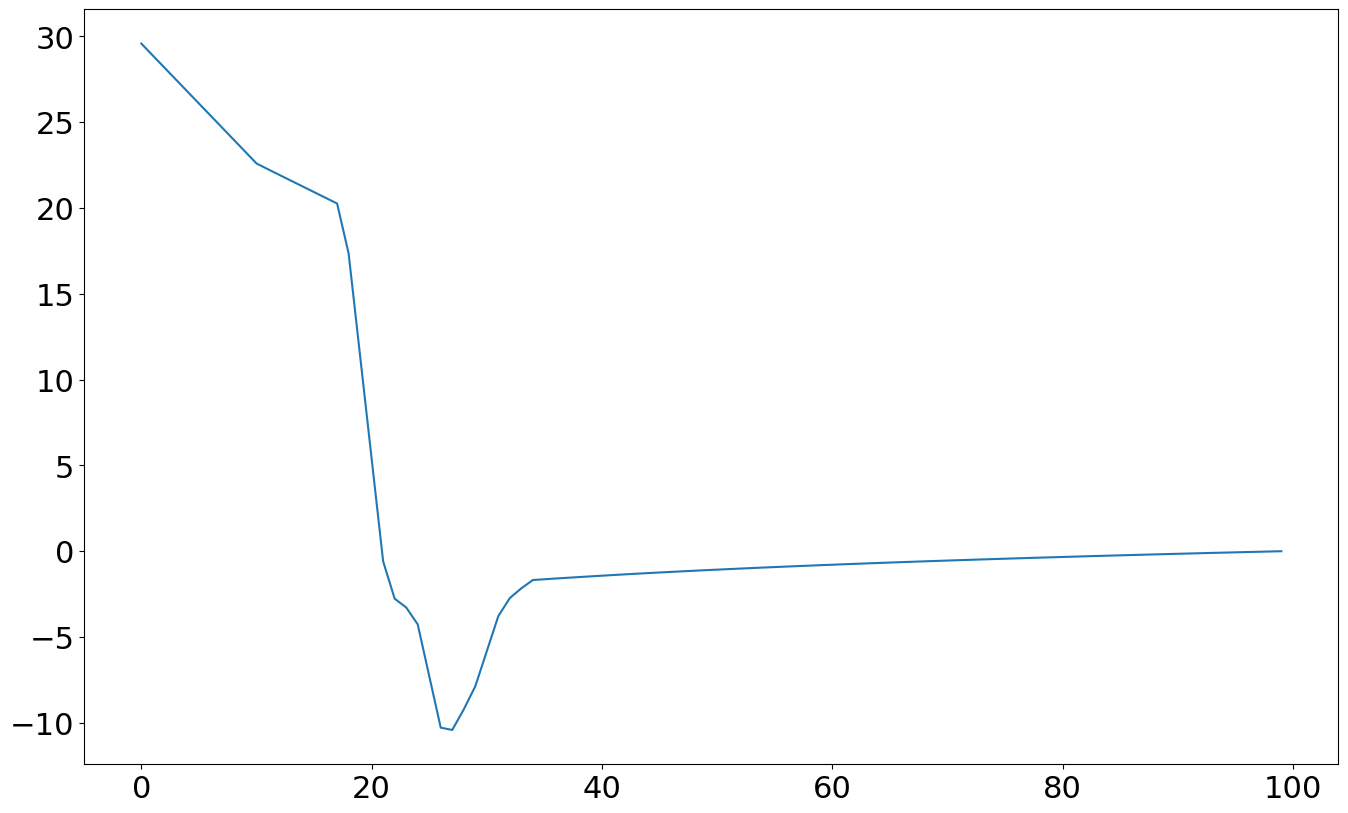

In [76]:
plt.plot(interaction_array[398681])

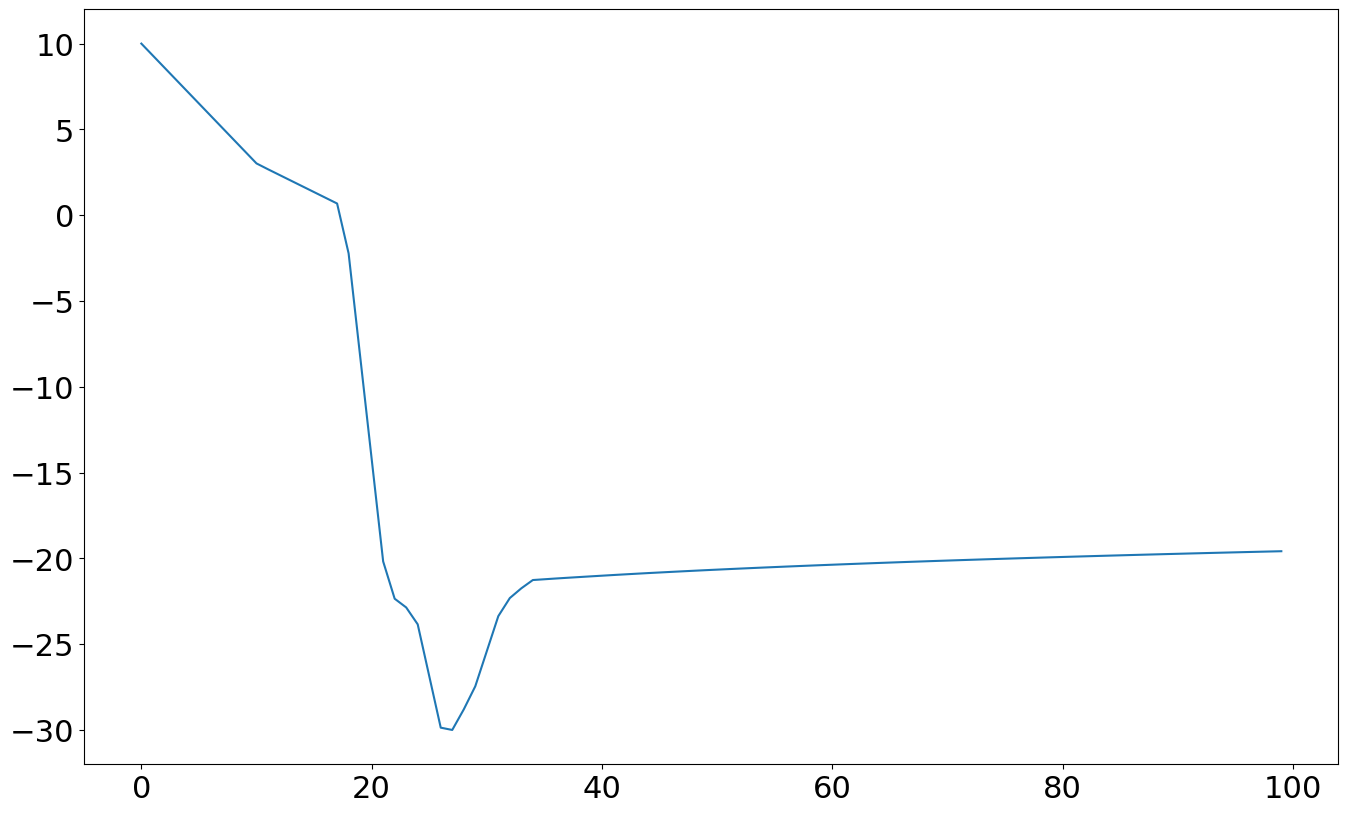

In [68]:
plt.plot(interaction_array[398681])

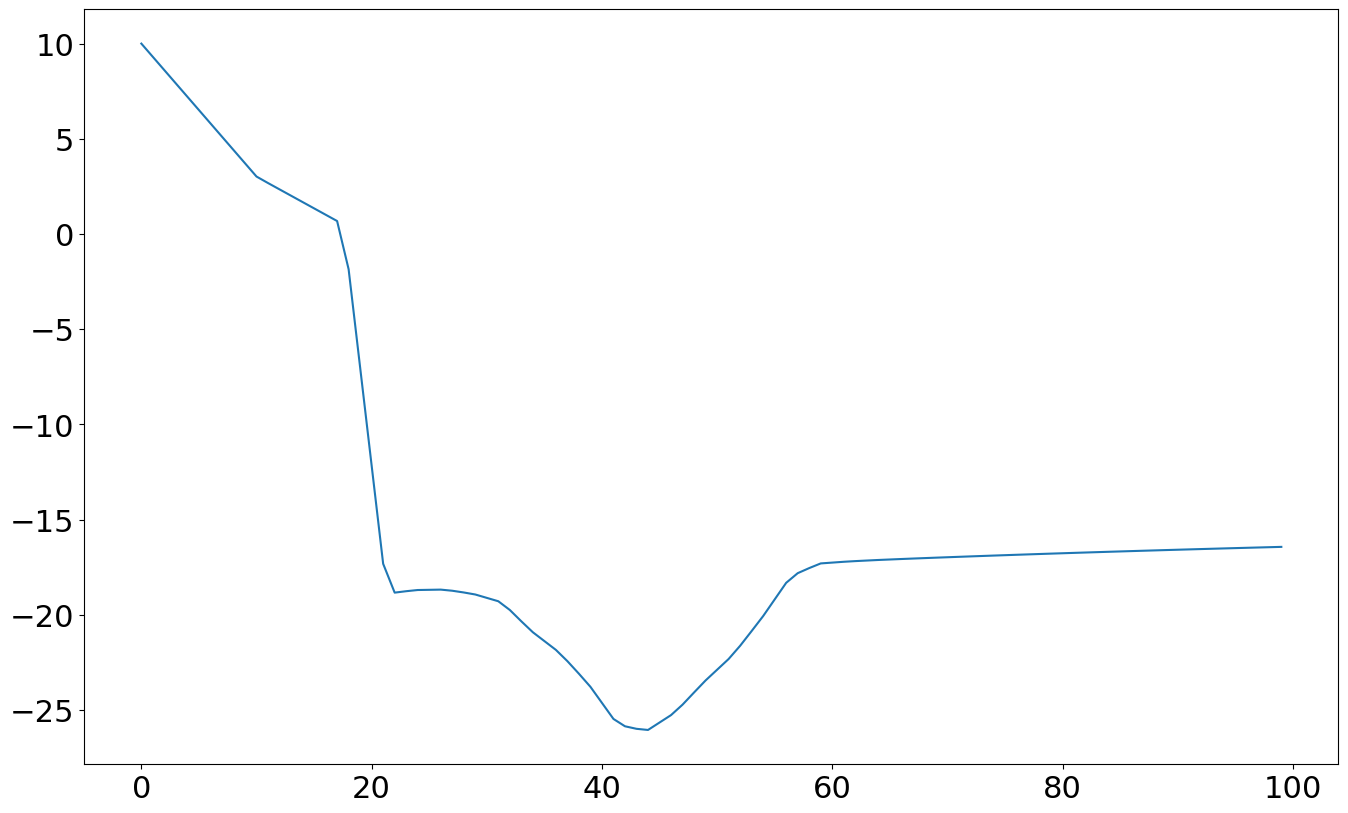

In [67]:
plt.plot(interaction_array[436433])

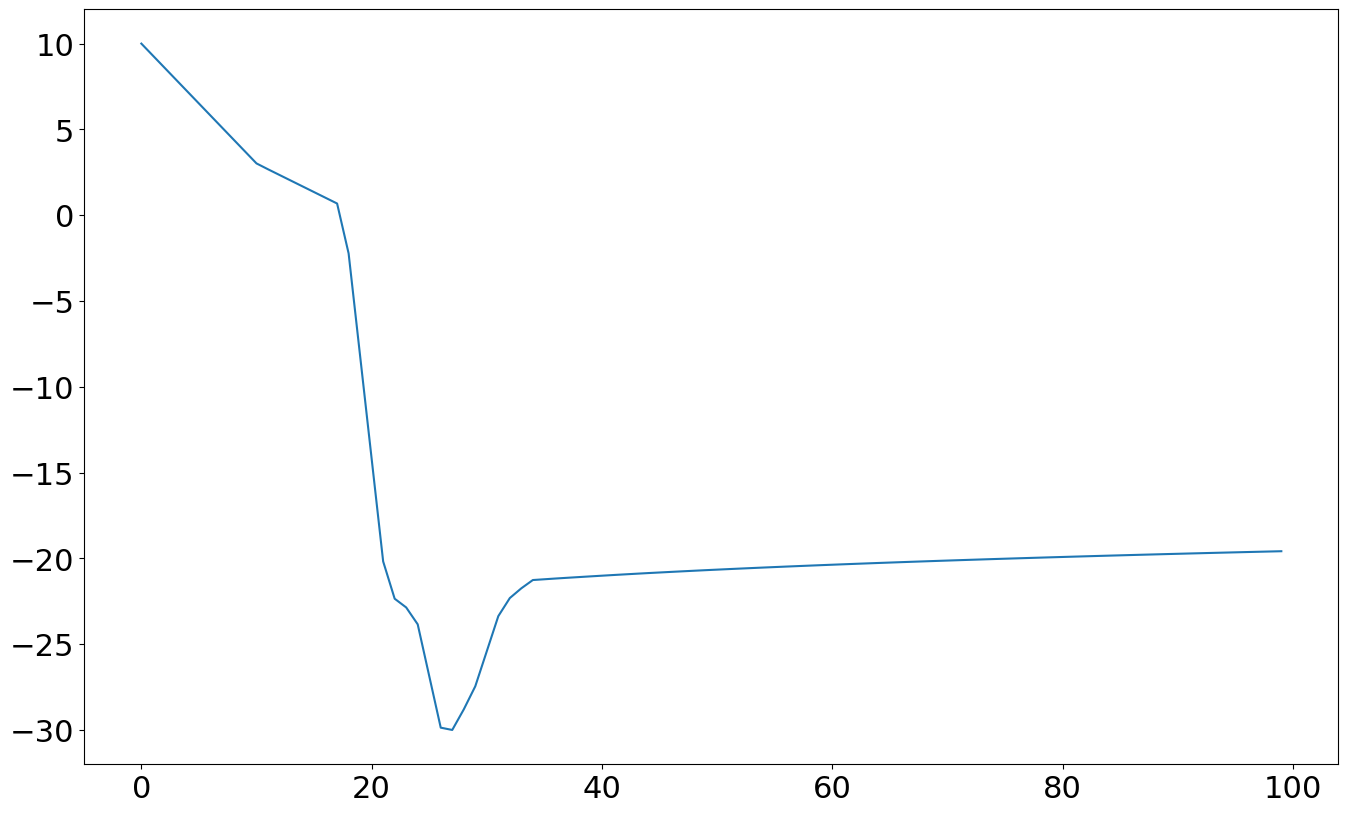

In [66]:
plt.plot(interaction_array[398681])

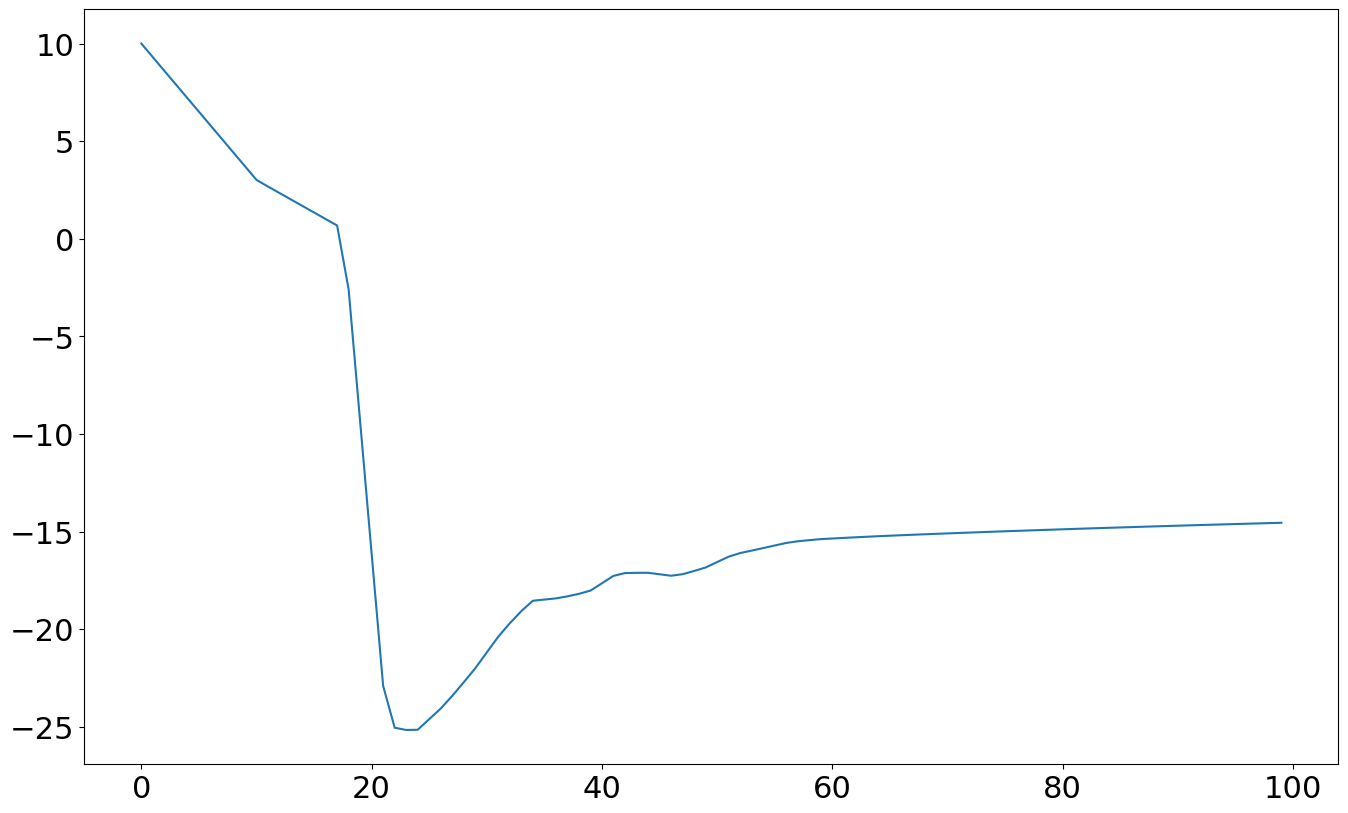

In [65]:
plt.plot(interaction_array[398142])

In [62]:


n = distspline.shape[0]
interaction_list = []
index_list = []
xnew = np.linspace(min(x), max(x), num=num_of_points, endpoint=True)
for i in range(n):
    for j in range(i+1, n):
        if np.alltrue(distspline[i][j] == 0):
            continue
        y = distspline[i][j]
        f = interp1d(x, y, kind='cubic')
        ynew = f(xnew)
        interaction_list.append(ynew)
        index_list.append([i, j])
index_array = np.array(index_list)
interaction_array = np.array(interaction_list)
# np.savez(saved_file, index_array=index_array, interaction_array=interaction_array)

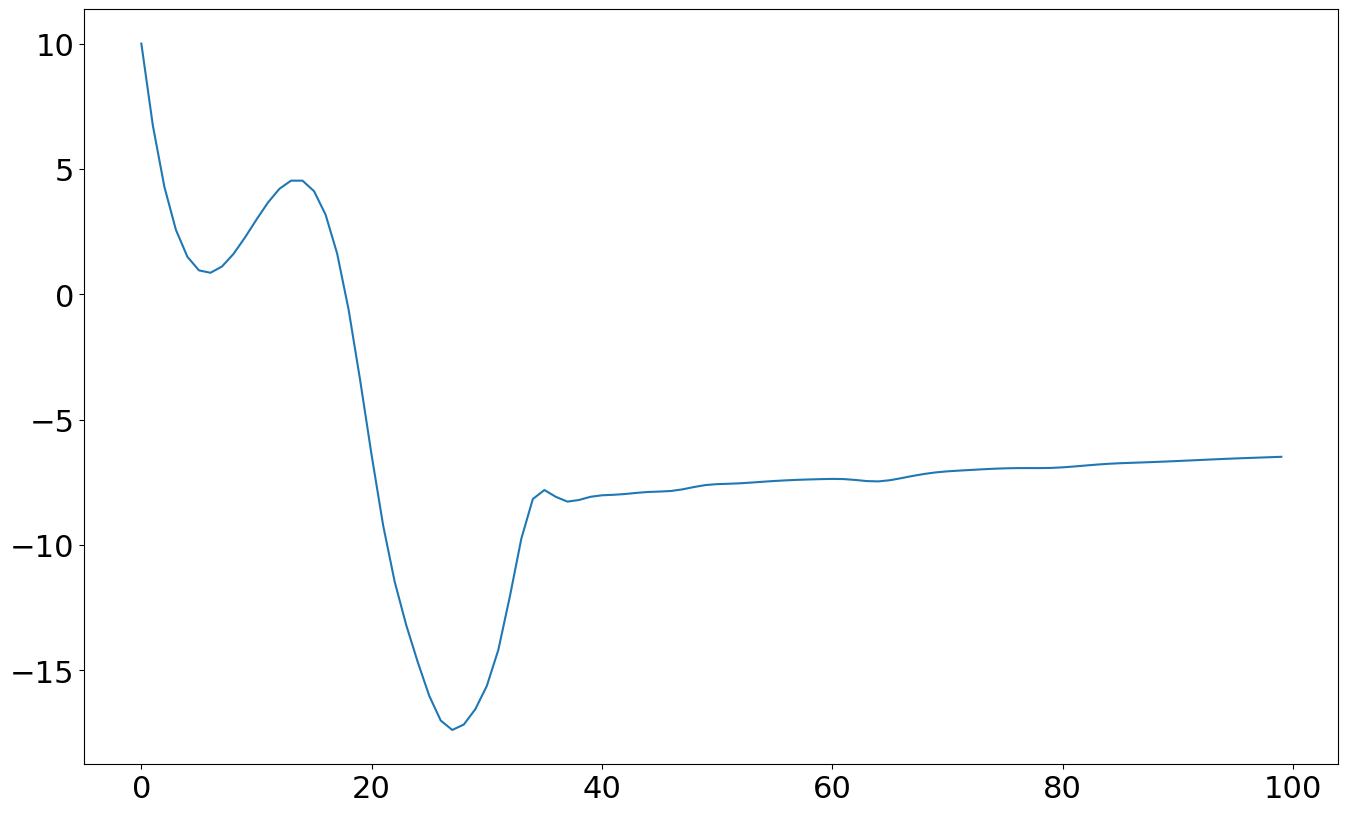

In [63]:
plt.plot(interaction_array[0])

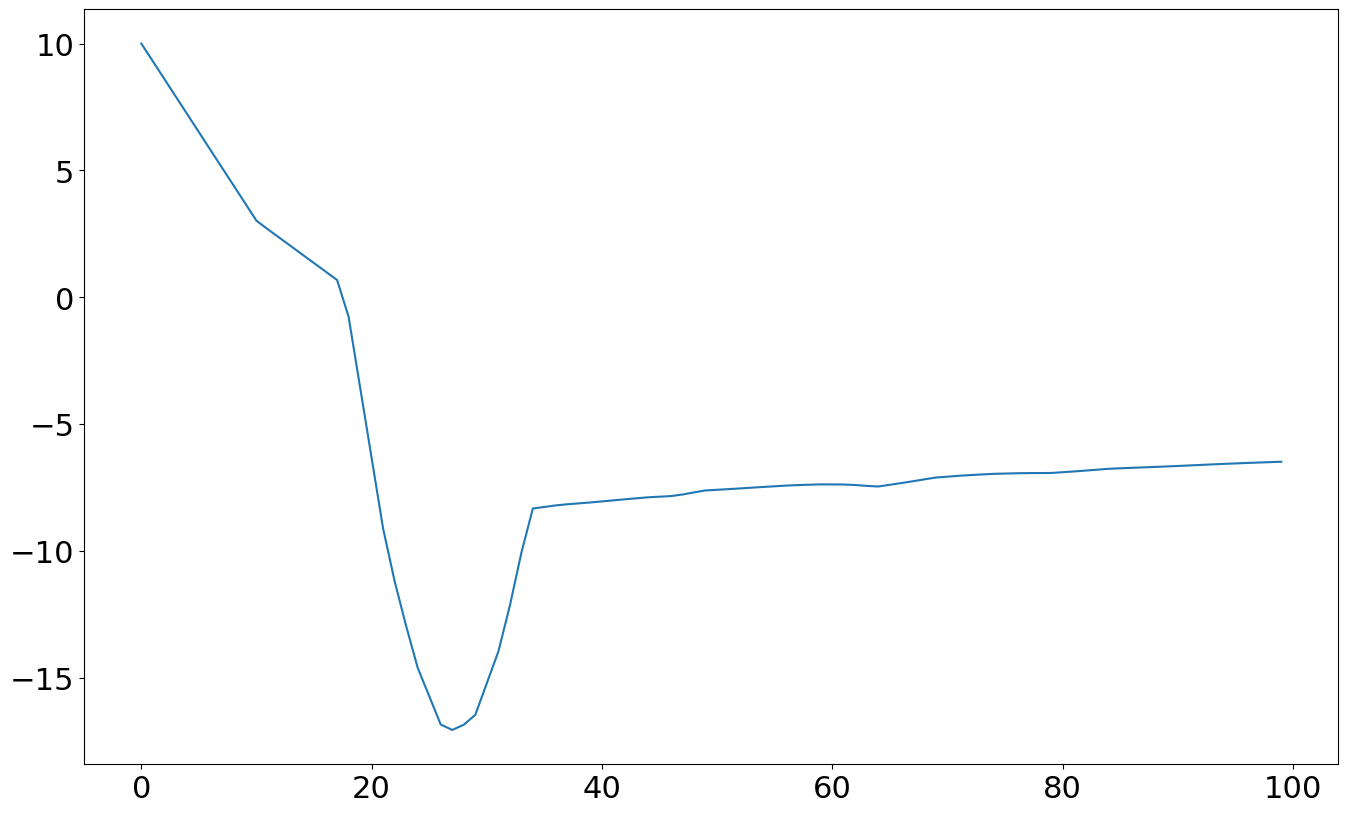

In [11]:
plt.plot(interaction_array[0])

In [ ]:
# check the Spline kind options